# Final Evaluation on Test Data  
- The best-performing pipeline for each classifier type is applied to the **unseen test dataset** to assess its generalization ability.  
- Performance metrics are calculated to ensure the model works well in real-world scenarios.  


In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import joblib

from sklearn.metrics import classification_report

import utils.plotting_evaluation as plot_eval
import utils.model_evaluation as model_eval


In [2]:
features_org = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
                'DiabetesPedigreeFunction', 'Age']
target = "Outcome"
features = ["Pregnancies", "Glucose", "BP", "Skin", "Insulin", "BMI", "DPF", "Age"]

# Load data
data_train = pd.read_csv("../data/preprocessed_diabetes_train.csv")
X_train, y_train = data_train[features_org], data_train[target]

data_test = pd.read_csv("../data/preprocessed_diabetes_test.csv")
X_test, y_test = data_test[features_org], data_test[target]

## Best Logistic Regression Model

In [3]:
best_pipeline_log_reg = joblib.load('../src/models/best_log_reg_pipeline.pkl')
y_pred = best_pipeline_log_reg.predict(X_test)

In [4]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       150
           1       0.65      0.72      0.68        81

    accuracy                           0.77       231
   macro avg       0.74      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



In [5]:
model_eval.evaluate_model_performance(best_pipeline_log_reg, X_train, y_train, X_test, y_test)

Evaluation Metrics (Cross-validation Data):
Accuracy: 0.7582 ± 0.0410
F1: 0.6706 ± 0.0550
Roc auc: 0.8420 ± 0.0418
Precision: 0.6451 ± 0.0655
Recall: 0.7129 ± 0.1056

Evaluation Metrics (Test Data):
Accuracy: 0.7662
F1 Score: 0.6824
ROC AUC: 0.8365
Precision: 0.6517
Recall: 0.716

Evaluation Metrics (Train Data):
Accuracy: 0.7728
F1 Score: 0.6904
ROC AUC: 0.8477
Precision: 0.657
Recall: 0.7273


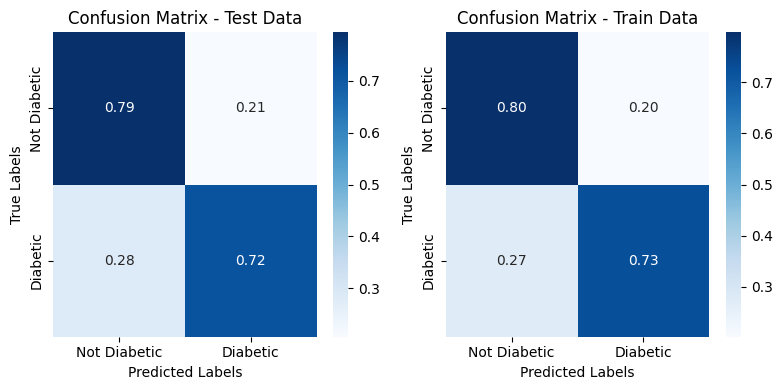

In [6]:
plot_eval.plot_confusion_matrix(best_pipeline_log_reg, X_train, y_train, X_test, y_test)

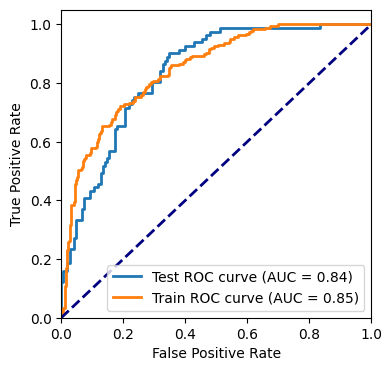

In [7]:
plot_eval.plot_roc_curve(best_pipeline_log_reg, X_train, y_train, X_test, y_test)

### Discussion
- The model slightly **favors class 0** (non-diabetic) as seen in the higher precision, recall, and F1-score.  
- This is likely due to the **class imbalance** in the data (**65% class 0, 35% class 1**), even though `class_weight='balanced'` was used.  

##### Evalution Metrics

| Data           | Accuracy        | F1 Score        | ROC AUC         | Precision       | Recall          |
|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| **Validation** | 0.7582 ± 0.0410 | 0.6706 ± 0.0550 | 0.8420 ± 0.0418 | 0.6451 ± 0.0655 | 0.7129 ± 0.1056 |
| **Test**       | 0.7662          | 0.6824          | 0.8365          | 0.6517          | 0.7160          |
| **Train**      | 0.7728          | 0.6904          | 0.8477          | 0.6570          | 0.7273          |


- The model performs consistently across train, validation and test data, suggesting no significant overfitting.  


## Best Random Forest Model

In [8]:
best_pipeline_rf = joblib.load('../src/models/best_random_forest_pipeline.pkl')
y_pred = best_pipeline_rf.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       150
           1       0.61      0.77      0.68        81

    accuracy                           0.75       231
   macro avg       0.73      0.75      0.74       231
weighted avg       0.77      0.75      0.75       231



In [10]:
model_eval.evaluate_model_performance(best_pipeline_rf, X_train, y_train, X_test, y_test)

Evaluation Metrics (Cross-validation Data):
Accuracy: 0.7749 ± 0.0494
F1: 0.6976 ± 0.0625
Roc auc: 0.8448 ± 0.0398
Precision: 0.6667 ± 0.0866
Recall: 0.7506 ± 0.1163

Evaluation Metrics (Test Data):
Accuracy: 0.7489
F1 Score: 0.6813
ROC AUC: 0.8454
Precision: 0.6139
Recall: 0.7654

Evaluation Metrics (Train Data):
Accuracy: 0.8324
F1 Score: 0.7805
ROC AUC: 0.9108
Precision: 0.7175
Recall: 0.8556


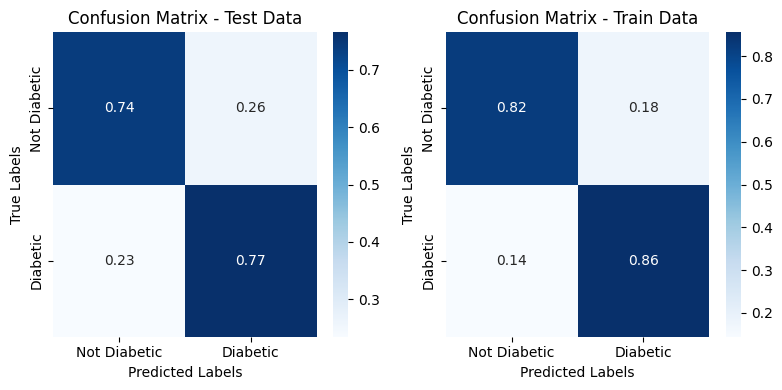

In [11]:
plot_eval.plot_confusion_matrix(best_pipeline_rf, X_train, y_train, X_test, y_test)

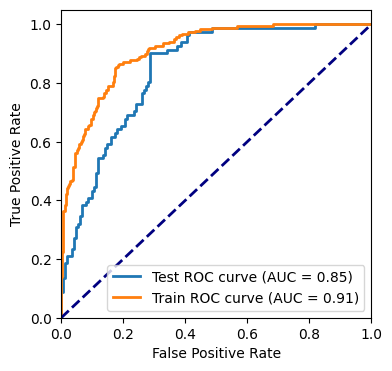

In [12]:
plot_eval.plot_roc_curve(best_pipeline_rf, X_train, y_train, X_test, y_test)

### Discussion

- The model slightly **favors class 0** (non-diabetic) as seen in the higher precision, recall, and F1-score.  

##### Evaluation Metrics

| Data           | Accuracy        | F1 Score        | ROC AUC         | Precision       | Recall          |
|----------------|-----------------|-----------------|-----------------|-----------------|-----------------|
| **Validation** | 0.7749 ± 0.0494 | 0.6976 ± 0.0625 | 0.8448 ± 0.0398 | 0.6667 ± 0.0866 | 0.7506 ± 0.1163 |
| **Test**       | 0.7489          | 0.6813          | 0.8454          | 0.6139          | 0.7654          |
| **Train**      | 0.8324          | 0.7805          | 0.9108          | 0.7175          | 0.8556          |

- The model performs slightly worse on the test data than on the validation data, especially for accuracy and precision.
- The larger differences between the metrics of the train and the validation/test data suggest overfitting.


## Conclusion

- **Random Forest** shows more overfitting, likely due to its complexity, while **Logistic Regression** performs more consistently across datasets without significant overfitting.
- Both models exhibit slight bias towards **Class 0** (non-diabetic), with higher precision, recall, and F1-score for this class.


| Metric                  | Random Forest | Logistic Regression |
|-------------------------|---------------|---------------------|
| **Accuracy**            | 0.75          | **0.77**            |
| **F1 Score**            | **0.68**      | **0.68**            |
| **ROC AUC**             | **0.85**      | 0.84                |
| **Precision**           | 0.61          | **0.65**            |
| **Recall**              | **0.77**      | 0.72                |
| **Precision (Class 0)** | **0.85**      | 0.84                |
| **Precision (Class 1)** | 0.61          | **0.65**            |
| **Recall (Class 0)**    | 0.74          | **0.79**            |
| **Recall (Class 1)**    | **0.77**      | 0.72                |
| **F1-Score (Class 0)**  | 0.79          | **0.82**            |
| **F1-Score (Class 1)**  | 0.68          | **0.68**            |

#### Improvements
- Feature engineering and **SMOTE** could help reduce bias and improve recall for **Class 1**.
- Simplifying the **Random Forest** model by reducing complexity and selecting better features may address the overfitting issue.